### IMPORT LIBRARIES

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from googleapiclient.discovery import build
import os


### REQUESTING DATA FROM YOUTUBE API

In [63]:
api_key = os.environ.get('YOUTUBE_API')
youtube= build('youtube','v3',developerKey=api_key)

In [64]:
request = youtube.channels().list(part='statistics',id=['UCZaT7TplNF541ySP8SlHVGA','UCxeK534L7DDIwPFv_o9CZjw','UCNWnkblY5_kmf4OQ9l0LgnA','UC2jqf9lgDjMUtTow1Q4IKzg','UCoLrny_Oky6BE206kOfTmiw',
                                'UCnU7B7B0U0t2vs-2HMLjgvg','UCve-Ci-M4CkBOmNi2LQdCRg','UCENXPJrzbHXudxhURfk5NCg','UCpI50OSBxxalmRZRq4gtRDw','UCBci3py0IfkjkjPKDE-B6Bw','UCKKG465DFaJ3Yp-jQHA3jhw',
                                'UC3RPfeyaEIPosC4eIcNr4Gw','UCvA2SgPVi3Hw6n_WER0VrcQ','UCS7H_WWPj5_qfD-zoUzuX2A','UC05cNJvMKzDLRPo59X2Xx7g','UC1Gh_pQ7l41tyBn2HeJ1k-A','UCybiT6P8jSv7gIxC4cHXl2Q',
                                'UCkXEh3jSl4oB1mQqjIePfTg','UCgIMbGazP0uBDy9JVCqBUaA','UCmAQ_4ELJodnKuNqviK86Dg','UCeiRABiGBQTzpuEYohN_I1Q','UCWkTX0S0Ii5pT2aRVz7Zctw','UCmBaK2wdmP1LZ9gLkkHiM4Q',
                                'UCdhukF6o5_ENjbf_9oNGXNQ','UCpXMHgjrpnynDSV5mXpqImw','UCWWLs-O8JGYYcNea7AgumAA','UCwaMqLYzbyp2IbFgcF_s5Og','UCZjXWMvOrhc91chSDPDUspA','UCVPkZh_H6m_stW8hq-2-yNw',
                                'UCUnB3WNX238eraj5IK3fFEw']) # PASSED IN A LIST OF YOUTUBE CHANNEL ID'S FOR EACH MLB TEAM'S OFFICIAL YOUTUBE CHANNEL
response = request.execute()


### CREATING MLB TEAM DATAFRAME

In [65]:
#CREATED DICTIONARY WITH EACH TEAM AND THEIR YOUTUBE CHANNEL ID
channel_dict = {'Arizona Diamondbacks':'UCxeK534L7DDIwPFv_o9CZjw','Atlanta Braves':'UCNWnkblY5_kmf4OQ9l0LgnA','Baltimore Orioles':'UC2jqf9lgDjMUtTow1Q4IKzg',
                'Boston Red Sox':'UCoLrny_Oky6BE206kOfTmiw','Chicago Cubs':'UCnU7B7B0U0t2vs-2HMLjgvg','Chicago White Sox':'UCve-Ci-M4CkBOmNi2LQdCRg',
                'Cincinnati Reds':'UCENXPJrzbHXudxhURfk5NCg','Cleveland Guardians':'UCpI50OSBxxalmRZRq4gtRDw','Colorado Rockies':'UCBci3py0IfkjkjPKDE-B6Bw',
                'Detroit Tigers':'UCKKG465DFaJ3Yp-jQHA3jhw','Houston Astros':'UC3RPfeyaEIPosC4eIcNr4Gw','Kansas City Royals':'UCvA2SgPVi3Hw6n_WER0VrcQ',
                'Los Angeles Angels':'UCS7H_WWPj5_qfD-zoUzuX2A','Los Angeles Dodgers':'UC05cNJvMKzDLRPo59X2Xx7g','Miami Marlins':'UC1Gh_pQ7l41tyBn2HeJ1k-A',
                'Milwaukee Brewers':'UCybiT6P8jSv7gIxC4cHXl2Q','Minnesota Twins':'UCkXEh3jSl4oB1mQqjIePfTg','New York Mets':'UCgIMbGazP0uBDy9JVCqBUaA',
                'New York Yankees':'UCmAQ_4ELJodnKuNqviK86Dg','Oakland Athletics':'UCeiRABiGBQTzpuEYohN_I1Q','Philadelphia Phillies':'UCWkTX0S0Ii5pT2aRVz7Zctw',
                'Pittsburgh Pirates':'UCmBaK2wdmP1LZ9gLkkHiM4Q','San Diego Padres':'UCdhukF6o5_ENjbf_9oNGXNQ','San Francisco Giants':'UCpXMHgjrpnynDSV5mXpqImw',
                'Seattle Mariners':'UCWWLs-O8JGYYcNea7AgumAA','St Louis Cardinals':'UCwaMqLYzbyp2IbFgcF_s5Og','Tampa Bay Rays':'UCZaT7TplNF541ySP8SlHVGA',
                'Texas Rangers':'UCZjXWMvOrhc91chSDPDUspA','Toronto Blue Jays':'UCVPkZh_H6m_stW8hq-2-yNw','Washington Nationals':'UCUnB3WNX238eraj5IK3fFEw'}

In [66]:
team_keys=channel_dict.keys()
team_keys=list(team_keys)

In [67]:
team_ids = channel_dict.values()
team_ids= list(team_ids)

In [68]:
data = {'Team':team_keys,'id':team_ids}
team_df=pd.DataFrame(data=data)
team_df

,Team,id
0,Arizona Diamondbacks,UCxeK534L7DDIwPFv_o9CZjw
1,Atlanta Braves,UCNWnkblY5_kmf4OQ9l0LgnA
2,Baltimore Orioles,UC2jqf9lgDjMUtTow1Q4IKzg
3,Boston Red Sox,UCoLrny_Oky6BE206kOfTmiw
4,Chicago Cubs,UCnU7B7B0U0t2vs-2HMLjgvg
5,Chicago White Sox,UCve-Ci-M4CkBOmNi2LQdCRg
6,Cincinnati Reds,UCENXPJrzbHXudxhURfk5NCg
7,Cleveland Guardians,UCpI50OSBxxalmRZRq4gtRDw
8,Colorado Rockies,UCBci3py0IfkjkjPKDE-B6Bw
9,Detroit Tigers,UCKKG465DFaJ3Yp-jQHA3jhw


### CREATING YOUTUBE STATISTICS DATAFRAME

In [69]:
#Loop through values in items key and extract IDs.  Added IDs to a list.
id_rows=[]
for value in response['items']:
    id_rows.append(value['id'])
    

In [70]:
#Loop through values in items key and extract statistics.  Added statistics to a list.  Statistics is another dictionary so result is a list of dictionaries for each MLB team.

statistics_rows=[]
for value in response['items']:
    statistics_rows.append(value['statistics'])

In [71]:
#Loop through values in the statistics_rows list and extract individual statistics.  
viewCount=[]
subscriberCount=[] 
hiddenSubscriberCount=[]
videoCount=[]
for value in statistics_rows:
    viewCount.append(value['viewCount'])
    subscriberCount.append(value['subscriberCount'])
    hiddenSubscriberCount.append(value['hiddenSubscriberCount'])
    videoCount.append(value['videoCount'])


In [72]:
#Creating statistics dataframe from extracted values.
d ={'id':id_rows,'viewCount':viewCount, 'subscriberCount':subscriberCount, 'hiddenSubscriberCount':hiddenSubscriberCount, 'videoCount':videoCount} 
statistics_df = pd.DataFrame(data=d)
statistics_df

,id,viewCount,subscriberCount,hiddenSubscriberCount,videoCount
0,UCWkTX0S0Ii5pT2aRVz7Zctw,1637570,33900,False,83
1,UC05cNJvMKzDLRPo59X2Xx7g,40897769,212000,False,624
2,UCS7H_WWPj5_qfD-zoUzuX2A,1716732,45100,False,86
3,UCpI50OSBxxalmRZRq4gtRDw,1656695,18500,False,345
4,UCZaT7TplNF541ySP8SlHVGA,18915,16200,False,16
5,UCve-Ci-M4CkBOmNi2LQdCRg,2391928,38400,False,469
6,UCwaMqLYzbyp2IbFgcF_s5Og,3989037,69800,False,484
7,UCybiT6P8jSv7gIxC4cHXl2Q,2388687,28400,False,185
8,UCENXPJrzbHXudxhURfk5NCg,709690,15400,False,505
9,UCUnB3WNX238eraj5IK3fFEw,623870,12900,False,214


### MERGE STATISTICS AND TEAM DATAFRAMES

In [73]:
#Merge the team dataframe and statistics dataframe to link team names to statistics
mlb_youtube_stats_df=team_df.merge(right=statistics_df,how='left',on='id')
mlb_youtube_stats_df

,Team,id,viewCount,subscriberCount,hiddenSubscriberCount,videoCount
0,Arizona Diamondbacks,UCxeK534L7DDIwPFv_o9CZjw,2242174,21200,False,300
1,Atlanta Braves,UCNWnkblY5_kmf4OQ9l0LgnA,12892013,99200,False,310
2,Baltimore Orioles,UC2jqf9lgDjMUtTow1Q4IKzg,2268757,20900,False,711
3,Boston Red Sox,UCoLrny_Oky6BE206kOfTmiw,4311070,80900,False,256
4,Chicago Cubs,UCnU7B7B0U0t2vs-2HMLjgvg,36330294,213000,False,687
5,Chicago White Sox,UCve-Ci-M4CkBOmNi2LQdCRg,2391928,38400,False,469
6,Cincinnati Reds,UCENXPJrzbHXudxhURfk5NCg,709690,15400,False,505
7,Cleveland Guardians,UCpI50OSBxxalmRZRq4gtRDw,1656695,18500,False,345
8,Colorado Rockies,UCBci3py0IfkjkjPKDE-B6Bw,643656,11500,False,269
9,Detroit Tigers,UCKKG465DFaJ3Yp-jQHA3jhw,3046811,23300,False,774


In [74]:
mlb_youtube_stats_df.dtypes

Team                     object
id                       object
viewCount                object
subscriberCount          object
hiddenSubscriberCount      bool
videoCount               object
dtype: object

In [75]:
#Convert string datatypes to float datatypes
mlb_youtube_stats_df=mlb_youtube_stats_df.astype({'viewCount':'float64','subscriberCount':'float64','videoCount':'float64'})

### EXPLORATORY ANALYSIS

In [76]:
mlb_youtube_stats_df.describe()

,viewCount,subscriberCount,videoCount
count,3.000000e+01,30.000000,30.000000
mean,7.338240e+06,51958.666667,501.333333
std,1.044908e+07,52900.612847,470.729466
min,1.891500e+04,9960.000000,16.000000
25%,1.249514e+06,18600.000000,246.250000
50%,2.363056e+06,31150.000000,364.500000
75%,8.801060e+06,73025.000000,610.500000
max,4.089777e+07,213000.000000,2279.000000


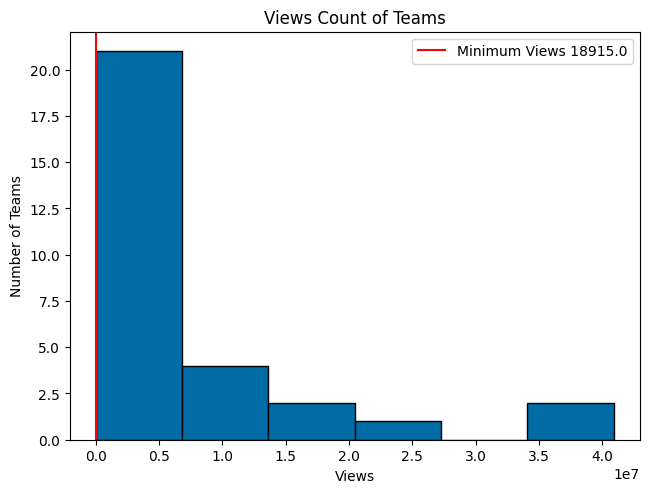

In [77]:
#CREATING A HISTOGRAM OF VIEWS COUNT
views = mlb_youtube_stats_df['viewCount']
plt.style.use('tableau-colorblind10')
plt.hist(views,bins=6,edgecolor='black')
min_views = mlb_youtube_stats_df['viewCount'].min()
plt.axvline(min_views,label='Minimum Views '+ str(min_views),color='red')
plt.legend()
plt.tight_layout()
plt.title('Views Count of Teams')
plt.xlabel('Views')
plt.ylabel('Number of Teams')
plt.show()

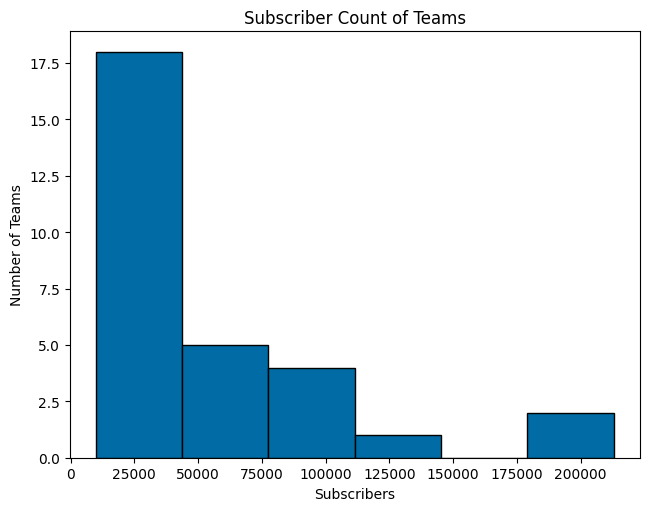

In [78]:
#CREATING A HISTOGRAM OF SUBSCRIBER COUNT
plt.style.use('tableau-colorblind10')
plt.hist(mlb_youtube_stats_df['subscriberCount'],bins=6,edgecolor='black')
plt.tight_layout()
plt.title('Subscriber Count of Teams')
plt.xlabel('Subscribers')
plt.ylabel('Number of Teams')
plt.show()

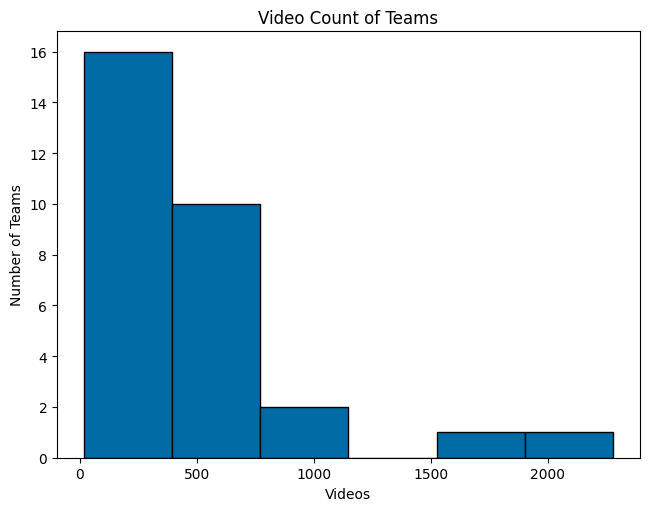

In [79]:
#CREATING A HISTOGRAM OF VIDEO COUNT
plt.style.use('tableau-colorblind10')
plt.hist(mlb_youtube_stats_df['videoCount'],bins=6,edgecolor='black')
plt.tight_layout()
plt.title('Video Count of Teams')
plt.xlabel('Videos')
plt.ylabel('Number of Teams')
plt.show()

<Axes: title={'center': 'Total Subscribers'}, ylabel='Team'>

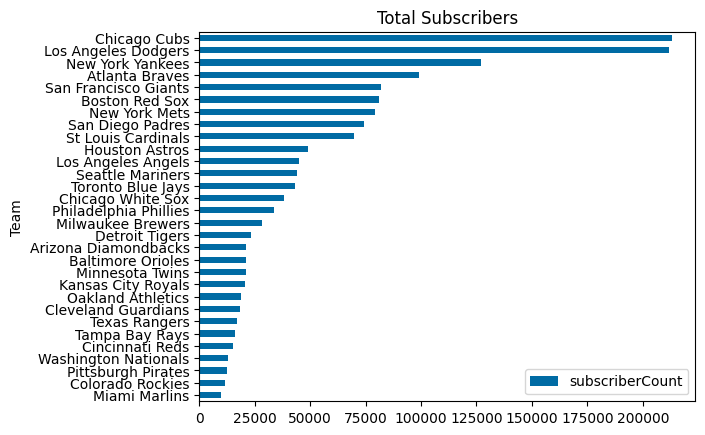

In [80]:
mlb_youtube_stats_df.sort_values(by='subscriberCount').plot(x='Team',y='subscriberCount',kind='barh',title='Total Subscribers')

<Axes: title={'center': 'Total Videos'}, ylabel='Team'>

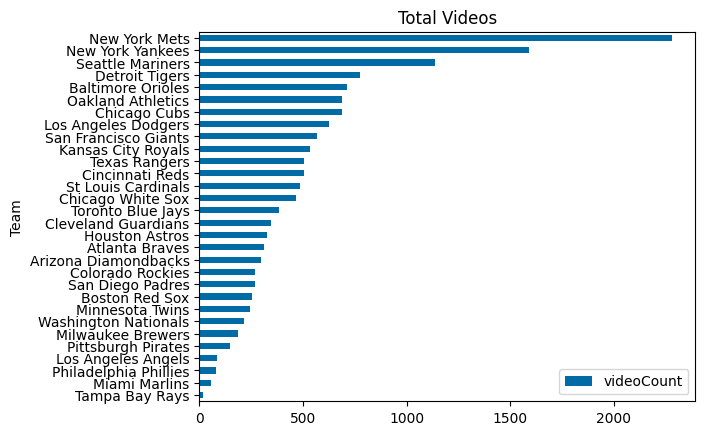

In [81]:
mlb_youtube_stats_df.sort_values(by='videoCount').plot(x='Team',y='videoCount',kind='barh',title='Total Videos')

<Axes: title={'center': 'Total Views'}, ylabel='Team'>

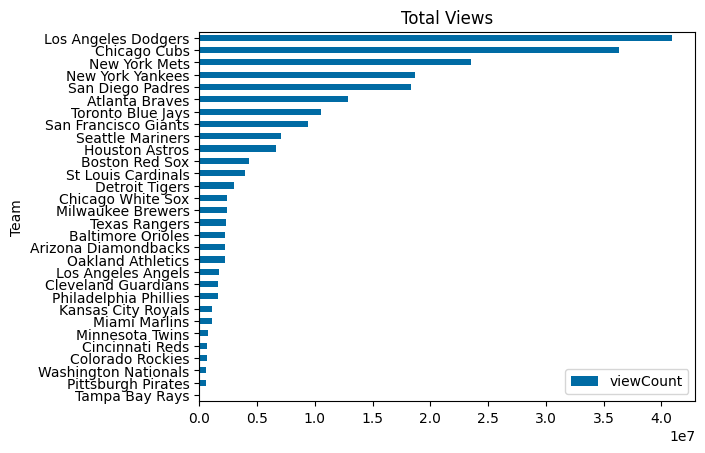

In [82]:
mlb_youtube_stats_df.sort_values(by='viewCount').plot(x='Team',y='viewCount',kind='barh',title='Total Views')

### MERGE ADDITIONAL ATTENDANCE DATAFRAME

In [83]:
attendance_df = pd.read_csv('mlbattendance.csv',usecols=['Team','Attendance'])
attendance_df

,Team,Attendance
0,Arizona Diamondbacks,1605199
1,Atlanta Braves,3129931
2,Baltimore Orioles,1368367
3,Boston Red Sox,2625089
4,Chicago Cubs,2616780
5,Chicago White Sox,2009359
6,Cincinnati Reds,1395770
7,Cleveland Guardians,1295870
8,Colorado Rockies,2597428
9,Detroit Tigers,1575544


In [84]:
mlb_youtube_stats_df = mlb_youtube_stats_df.merge(right=attendance_df,how='left',on='Team')
mlb_youtube_stats_df

,Team,id,viewCount,subscriberCount,hiddenSubscriberCount,videoCount,Attendance
0,Arizona Diamondbacks,UCxeK534L7DDIwPFv_o9CZjw,2242174.0,21200.0,False,300.0,1605199
1,Atlanta Braves,UCNWnkblY5_kmf4OQ9l0LgnA,12892013.0,99200.0,False,310.0,3129931
2,Baltimore Orioles,UC2jqf9lgDjMUtTow1Q4IKzg,2268757.0,20900.0,False,711.0,1368367
3,Boston Red Sox,UCoLrny_Oky6BE206kOfTmiw,4311070.0,80900.0,False,256.0,2625089
4,Chicago Cubs,UCnU7B7B0U0t2vs-2HMLjgvg,36330294.0,213000.0,False,687.0,2616780
5,Chicago White Sox,UCve-Ci-M4CkBOmNi2LQdCRg,2391928.0,38400.0,False,469.0,2009359
6,Cincinnati Reds,UCENXPJrzbHXudxhURfk5NCg,709690.0,15400.0,False,505.0,1395770
7,Cleveland Guardians,UCpI50OSBxxalmRZRq4gtRDw,1656695.0,18500.0,False,345.0,1295870
8,Colorado Rockies,UCBci3py0IfkjkjPKDE-B6Bw,643656.0,11500.0,False,269.0,2597428
9,Detroit Tigers,UCKKG465DFaJ3Yp-jQHA3jhw,3046811.0,23300.0,False,774.0,1575544


<Axes: title={'center': 'Total Attendance vs. Total Subscribers'}, xlabel='subscriberCount', ylabel='Attendance'>

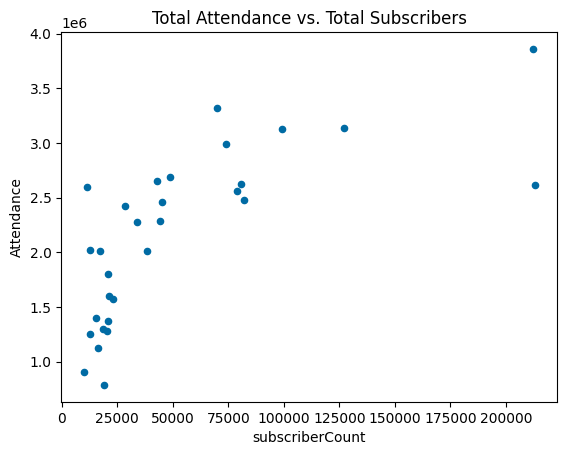

In [85]:
mlb_youtube_stats_df.plot(x='subscriberCount',y='Attendance',kind='scatter',title='Total Attendance vs. Total Subscribers')

<Axes: title={'center': 'Total Attendance vs. Total Views'}, xlabel='viewCount', ylabel='Attendance'>

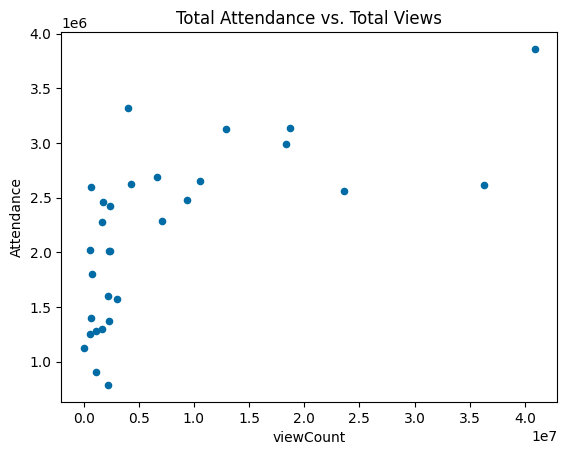

In [86]:
mlb_youtube_stats_df.plot(x='viewCount',y='Attendance',kind='scatter',title='Total Attendance vs. Total Views')

In [87]:
#WROTE FINAL DATAFRAME TO CSV FILE FOR FURTHER ANALYSIS
mlb_youtube_stats_df.to_csv('mlbyoutubestats.csv',index=False)